# Task 1

### Import Libraries

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Explore the dataset and identify the number of rows and columns.

In [51]:
df = pd.read_csv('Dataset .csv')

In [52]:
df.shape

(9551, 21)

In [53]:
print("Number of rows : ",df.shape[0]," and number of columns : ",df.shape[1])

Number of rows :  9551  and number of columns :  21


In [54]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


### Check for missing values in each column and handle them accordingly.

In [55]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [56]:
# There are missing values in Cuisines column

In [57]:
# Fill NaN values in the 'Cuisines' column with 'Unknown'
df['Cuisines'].fillna('Unknown', inplace=True)

In [58]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Perform data type conversion if necessary.

In [59]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [60]:
df['Country Code'] = df['Country Code'].astype('category')
df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': True, 'No': False})
df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': True, 'No': False})
df['Currency'] = df['Currency'].astype('category')
df['Rating color'] = df['Rating color'].astype('category')
df['Rating text'] = df['Rating text'].astype('category')

In [61]:
df.dtypes

Restaurant ID              int64
Restaurant Name           object
Country Code            category
City                      object
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                  object
Average Cost for two       int64
Currency                category
Has Table booking           bool
Has Online delivery         bool
Is delivering now           bool
Switch to order menu        bool
Price range                int64
Aggregate rating         float64
Rating color            category
Rating text             category
Votes                      int64
dtype: object

### Analyze the distribution of the target variable ("Aggregate rating") 

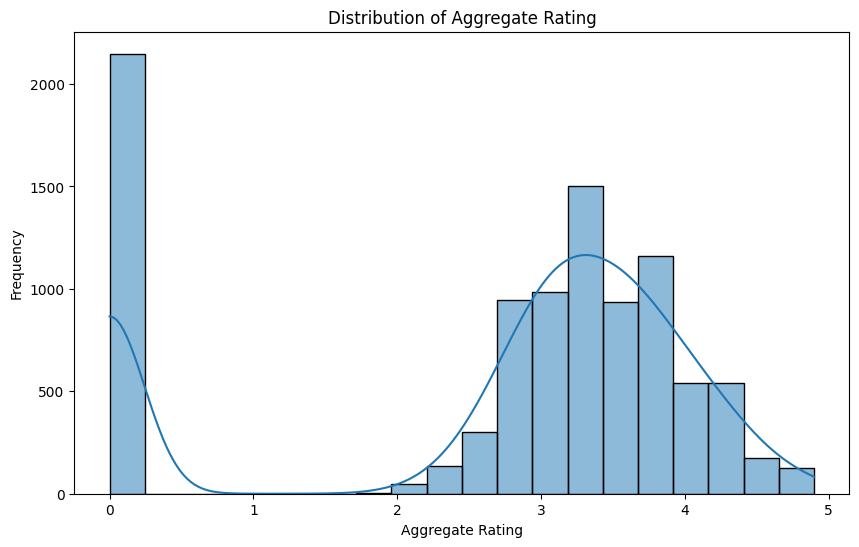

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

### identify any class imbalances.

In [68]:
class_counts = df['Aggregate rating'].value_counts()
print("Class Imbalance in Aggregate Rating:")
print(class_counts)

Class Imbalance in Aggregate Rating:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


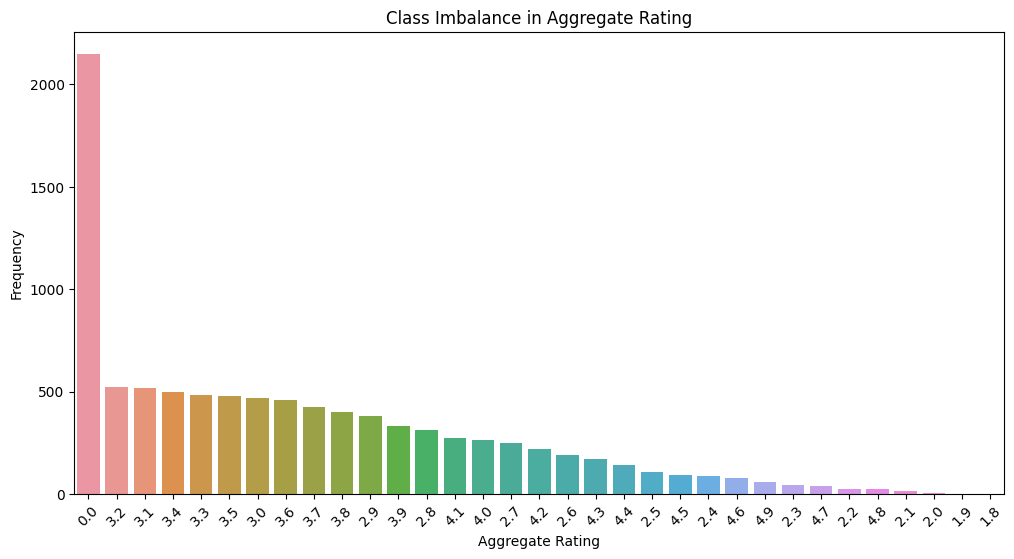

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Aggregate rating', data=df, order=df['Aggregate rating'].value_counts().index)
plt.title('Class Imbalance in Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Task 2

### Calculate basic statistical measures (mean,median, standard deviation, etc.) for numericalcolumns.

In [73]:
# Selecting only the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculating basic statistical measures
statistics = numerical_columns.describe()

# Print the statistics
statistics

,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Explore the distribution of categoricalvariables like "Country Code," "City," and"Cuisines."

In [75]:
# Selecting the categorical columns
categorical_columns = df[['Country Code', 'City', 'Cuisines']]

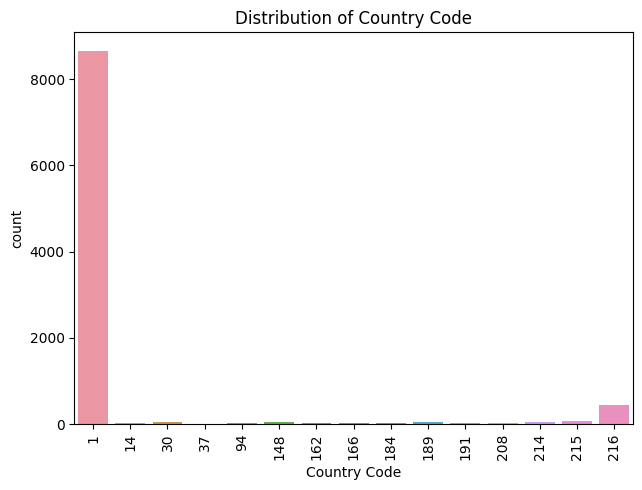

In [78]:
# Distribution of Country Code
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Country Code', data=categorical_columns)
plt.title('Distribution of Country Code')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

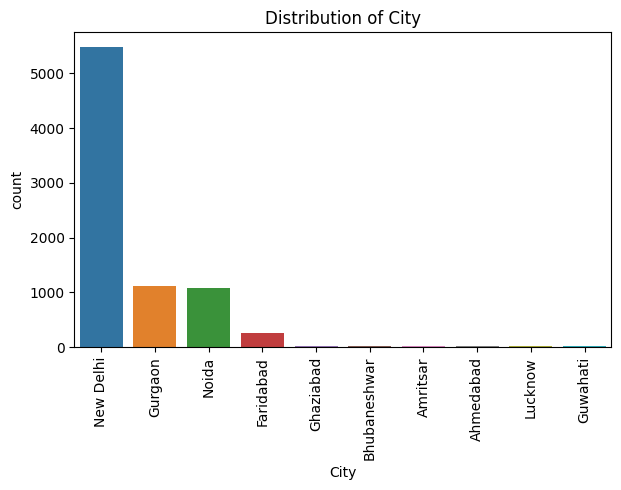

In [79]:
# Distribution of City
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
sns.countplot(x='City', data=categorical_columns, order=categorical_columns['City'].value_counts().index[:10])
plt.title('Distribution of City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


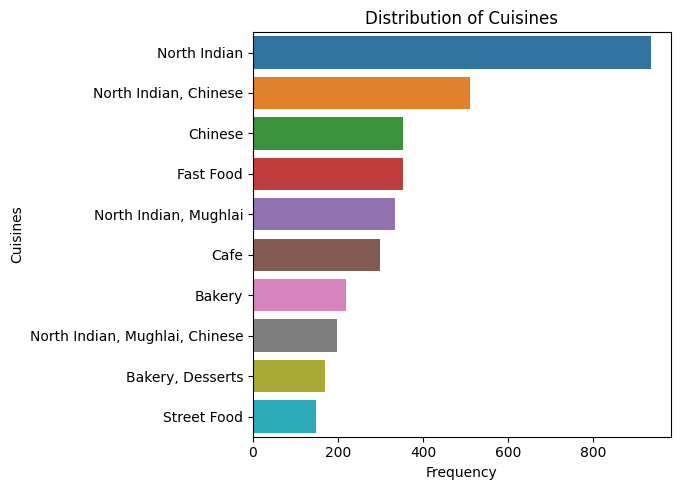

In [80]:
# Distribution of Cuisines
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
sns.countplot(y='Cuisines', data=categorical_columns, order=categorical_columns['Cuisines'].value_counts().index[:10])
plt.title('Distribution of Cuisines')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()


### Identify the top cuisines and cities with thehighest number of restaurants

In [81]:
top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top Cuisines:")
print(top_cuisines)

Top Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [83]:
top_cities = df['City'].value_counts().head(10)
print("\nTop Cities:")
print(top_cities)


Top Cities:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


# Task 3. Geospatial Analysis

### Visualize the locations of restaurants on a map using latitude and longitude information.

In [ ]:
import folium

# Create a map centered at the mean latitude and longitude
map_center = [df['Latitude'].mean(), df1['Longitude'].mean()]
map_restaurants = folium.Map(location=map_center, zoom_start=10)

# Add markers for each restaurant
for index, row in df1.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map_restaurants)

# Display the map
map_restaurants

### Analyze the distribution of restaurantsacross different cities or countries.

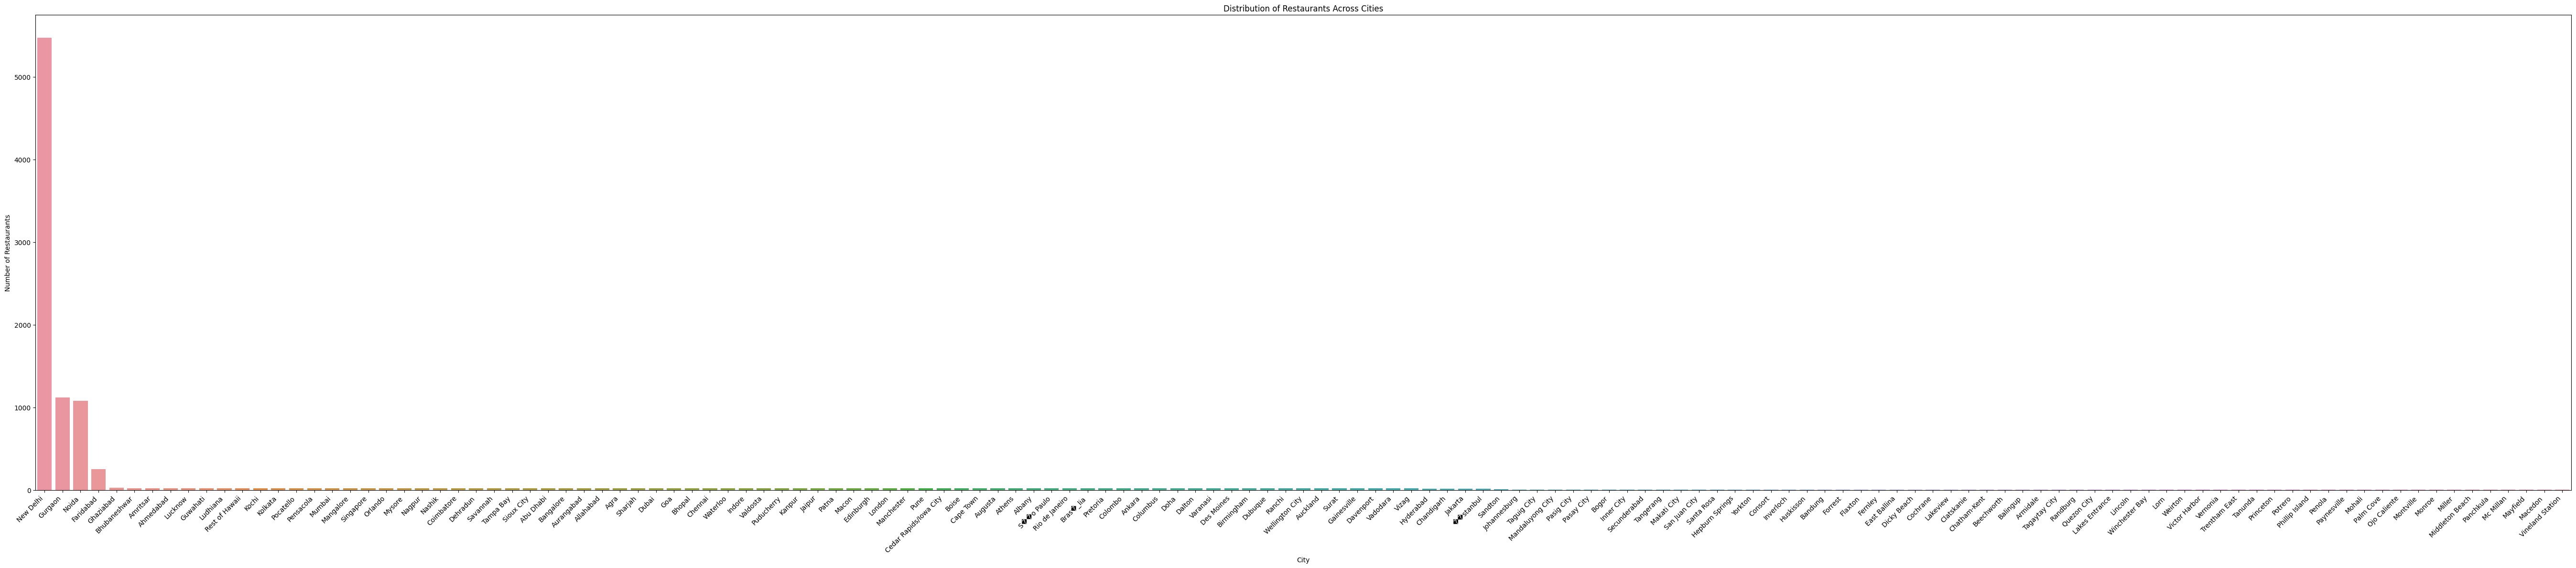

In [85]:
# Count the number of restaurants in each city
restaurants_by_city = df['City'].value_counts()

# Plotting the distribution of restaurants across cities

plt.figure(figsize=(54, 12)) 
sns.barplot(x=restaurants_by_city.index, y=restaurants_by_city.values)
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

### Determine if there is any correlation between the restaurant's location and it's rating.

In [86]:
# Calculate the correlation matrix
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract the correlation coefficient between latitude and rating
correlation_latitude_rating = correlation_matrix.loc['Latitude', 'Aggregate rating']
print("\nCorrelation between Latitude and Rating:", correlation_latitude_rating)

# Extract the correlation coefficient between longitude and rating
correlation_longitude_rating = correlation_matrix.loc['Longitude', 'Aggregate rating']
print("Correlation between Longitude and Rating:", correlation_longitude_rating)


Correlation Matrix:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000

Correlation between Latitude and Rating: 0.0005155806902363053
Correlation between Longitude and Rating: -0.11681757734540295
